[nltk_data] Downloading package punkt to
[nltk_data]     /home/the_architect/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/the_architect/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/the_architect/nltk_data...


One-Hot Encoding:
 [[0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]]
BoW Representation:
 [[0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]]
TF-IDF Representation:
 [[0.         0.46606681 0.         0.37601977 0.         0.
  0.         0.         0.         0.         0.46606681 0.
  0.         0.37601977 0.         0.         0.37601977 0.37601977
  0.         0.         0.         0.         0.        

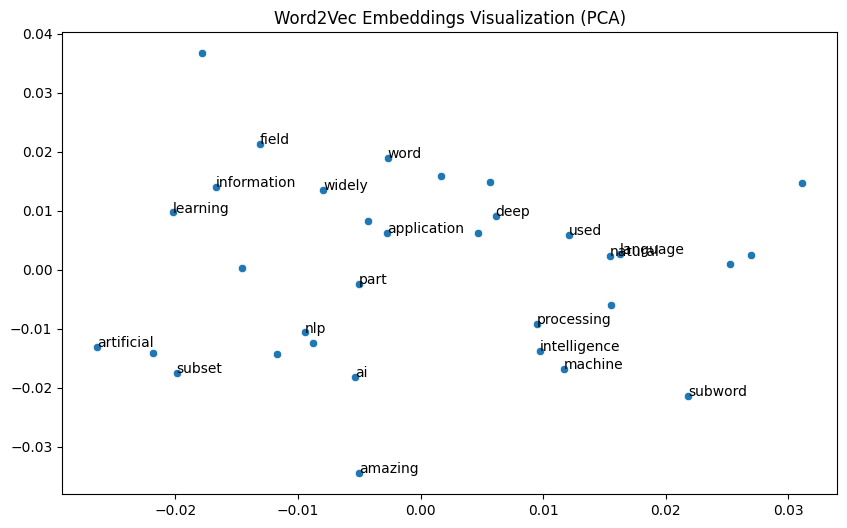

BoW Cosine Similarity:
 [[1.         0.36927447 0.28867513 0.         0.        ]
 [0.36927447 1.         0.         0.         0.        ]
 [0.28867513 0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]
TF-IDF Cosine Similarity:
 [[1.         0.29916864 0.22453665 0.         0.        ]
 [0.29916864 1.         0.         0.         0.        ]
 [0.22453665 0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]
Word2Vec Cosine Similarity:
 [[ 1.0000002   0.31449154  0.37627393 -0.03803853  0.01434742]
 [ 0.31449154  1.0000002   0.06655483  0.05126794  0.03597019]
 [ 0.37627393  0.06655483  1.         -0.07776494 -0.00366492]
 [-0.03803853  0.05126794 -0.07776494  1.0000001  -0.06180098]
 [ 0.01434742  0.03597019 -0.00366492 -0.06180098  0.9999999 ]]
FastText Cosine Simila

In [1]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec, FastText
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample dataset (You can replace this with a real dataset)
documents = [
    "Machine learning is amazing. It is a field of artificial intelligence.",
    "Deep learning is a subset of machine learning and is widely used in AI applications.",
    "Natural Language Processing (NLP) is a key part of artificial intelligence.",
    "Word embeddings help convert text into numerical representations for ML models.",
    "FastText is an extension of Word2Vec and captures subword information."
]

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

processed_docs = [preprocess_text(doc) for doc in documents]

# 3.1 One-Hot Encoding
vectorizer = CountVectorizer(binary=True)
one_hot_vectors = vectorizer.fit_transform(processed_docs).toarray()
print("One-Hot Encoding:\n", one_hot_vectors)

# 3.2 Bag of Words (BoW)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(processed_docs).toarray()
print("BoW Representation:\n", bow_matrix)

# 3.3 TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_docs).toarray()
print("TF-IDF Representation:\n", tfidf_matrix)

# 3.4 Word2Vec Representation
tokenized_docs = [doc.split() for doc in processed_docs]
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec Vector for 'learning':\n", word2vec_model.wv['learning'])
print("Most similar words to 'learning':\n", word2vec_model.wv.most_similar('learning'))

# 3.5 FastText Representation
fasttext_model = FastText(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)
print("FastText Vector for 'learning':\n", fasttext_model.wv['learning'])
print("Most similar words to 'learning':\n", fasttext_model.wv.most_similar('learning'))

# 4. Visualization using PCA
word_vectors = np.array([word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key])
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1])
for i, word in enumerate(word2vec_model.wv.index_to_key[:20]):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("Word2Vec Embeddings Visualization (PCA)")
plt.show()

# 5. Paragraph Similarity Computation
def get_paragraph_vector(model, doc):
    vectors = [model.wv[word] for word in doc.split() if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

bow_sim = cosine_similarity(bow_matrix)
tfidf_sim = cosine_similarity(tfidf_matrix)
w2v_sim = cosine_similarity([get_paragraph_vector(word2vec_model, doc) for doc in processed_docs])
ft_sim = cosine_similarity([get_paragraph_vector(fasttext_model, doc) for doc in processed_docs])

print("BoW Cosine Similarity:\n", bow_sim)
print("TF-IDF Cosine Similarity:\n", tfidf_sim)
print("Word2Vec Cosine Similarity:\n", w2v_sim)
print("FastText Cosine Similarity:\n", ft_sim)
